In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

### Exploratory Data Analysis

In [ ]:
data = pd.read_csv("drive/MyDrive/train.csv")

In [ ]:
data

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1
...,...,...,...,...,...
17489,25535,EverQuest II,2012.0,Arguably the single greatest mmorp that exists...,1
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own cha...",1
17491,25537,EverQuest II,2011.0,When I frist started playing Everquest 2 it wa...,1
17492,25538,EverQuest II,NaN,cool game. THe only thing that REALLY PISSES M...,1


In [ ]:
game_overview = pd.read_csv("drive/MyDrive/game_overview.csv")

In [ ]:
game_overview

,title,developer,publisher,tags,overview
0,Spooky's Jump Scare Mansion,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,Sakura Clicker,Winged Cloud,Winged Cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', ...",The latest entry in the Sakura series is more ...
2,WARMODE,WARTEAM,WARTEAM,"['Early Access', 'Free to Play', 'FPS', 'Multi...",Free to play shooter about the confrontation o...
3,Fractured Space,Edge Case Games Ltd.,Edge Case Games Ltd.,"['Space', 'Multiplayer', 'Free to Play', 'PvP'...",Take the helm of a gigantic capital ship and g...
4,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Counter-Strike: Global Offensive (CS: GO) expa...
...,...,...,...,...,...
59,Bloons TD Battles,Ninja Kiwi,Ninja Kiwi,"['Free to Play', 'Tower Defense', 'Multiplayer...",Play the top-rated tower defense franchise in ...
60,Cuisine Royale,Darkflow Software,Gaijin Distribution KFT,"['Early Access', 'Free to Play', 'Battle Royal...",Cuisine Royale is an all-kitchen-warfare Battl...
61,GUNS UP!,"Valkyrie Entertainment, LLC","PlayStation Mobile, Inc.","['Free to Play', 'Strategy', 'Multiplayer', 'A...","In a mashup of RTS & Tower Defense, GUNS UP! i..."
62,School of Dragons,"JumpStart Games, Inc.","JumpStart Games, Inc.","['Free to Play', 'Dragons', 'Adventure', 'Mult...",**Changewing Dragon now Available**Fly Fast. T...


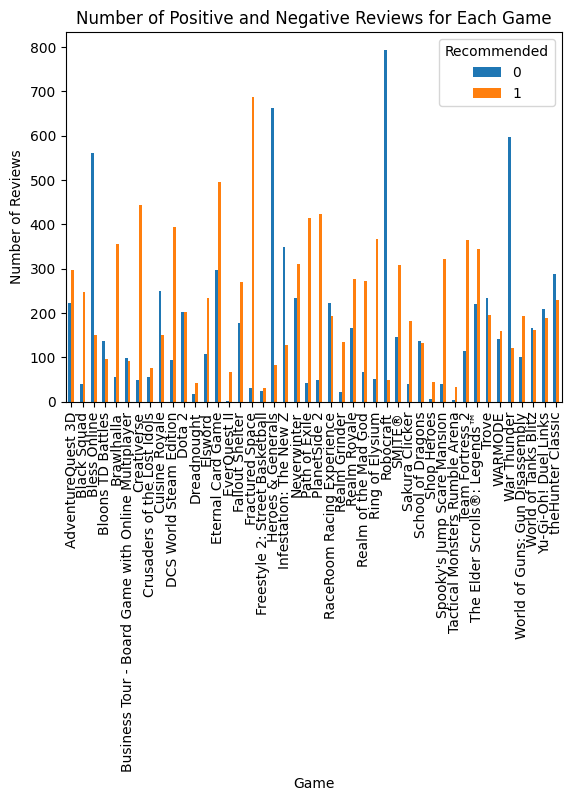

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

review_counts = data.groupby(['title', 'user_suggestion']).size().unstack(fill_value=0)

review_counts.plot(kind='bar', stacked=False)
plt.title('Number of Positive and Negative Reviews for Each Game')
plt.xlabel('Game')
plt.ylabel('Number of Reviews')
plt.legend(title='Recommended')
plt.xticks(rotation=90)
plt.show()

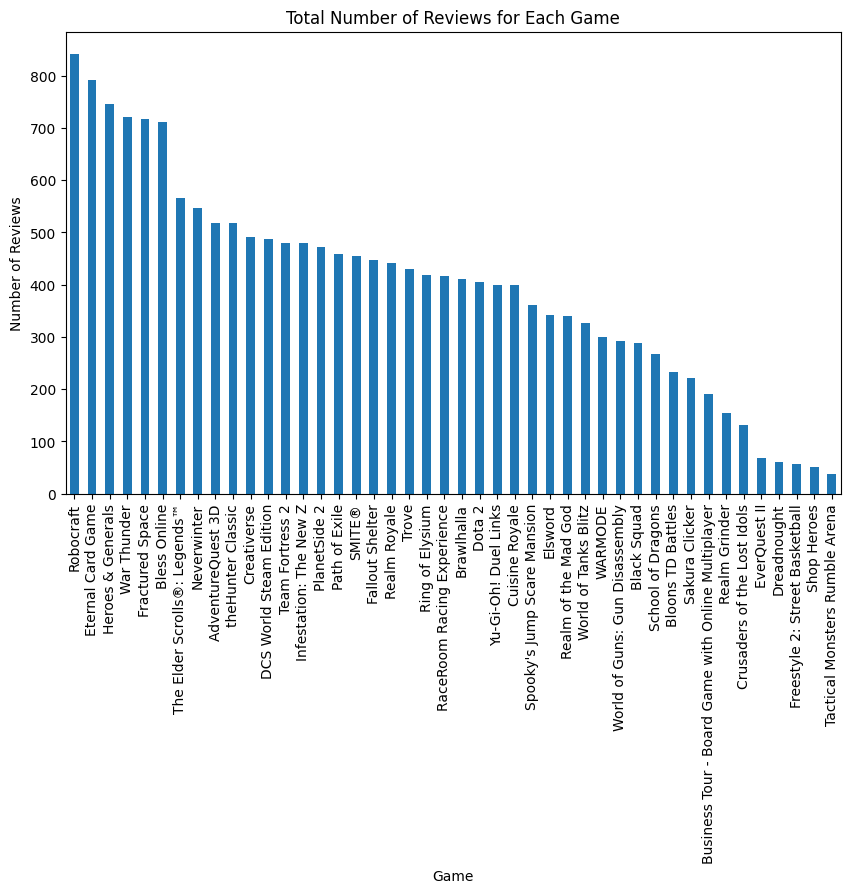

In [ ]:
review_counts = data.groupby('title').size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
review_counts.plot(kind='bar')
plt.title('Total Number of Reviews for Each Game')
plt.xlabel('Game')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()

### Preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Making it all lowercase
data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [ ]:
#Removing any links in the reviews, it may confuse the model
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+')
    return url_pattern.sub('', text)

data['lemmatized_tokens'] = data['user_review'].apply(remove_urls)

In [ ]:
#Removing any whitespace
data['lemmatized_tokens'] = data['lemmatized_tokens'].replace(to_replace=r'[^\w\s]', value='', regex=True)

In [ ]:
#Removing any digits
data['lemmatized_tokens'] = data['lemmatized_tokens'].replace(to_replace=r'\d', value='', regex=True)

In [ ]:
#Tokenizing the data
import nltk
from nltk.tokenize import word_tokenize
data['lemmatized_tokens'] = data['lemmatized_tokens'].apply(word_tokenize)

In [ ]:
#Removing stopwords
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
data['lemmatized_tokens'] = data['lemmatized_tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

data['lemmatized_tokens'] = data['lemmatized_tokens'].apply(lemmatize_text)
data

,review_id,title,year,user_review,user_suggestion,lemmatized_tokens
0,1,spooky's jump scare mansion,2016.0,i'm scared and hearing creepy voices. so i'll...,1,"[im, scared, hearing, creepy, voice, ill, paus..."
1,2,spooky's jump scare mansion,2016.0,"best game, more better than sam pepper's youtu...",1,"[best, game, better, sam, pepper, youtube, acc..."
2,3,spooky's jump scare mansion,2016.0,"a littly iffy on the controls, but once you kn...",1,"[littly, iffy, control, know, play, easy, mast..."
3,4,spooky's jump scare mansion,2015.0,"great game, fun and colorful and all that.a si...",1,"[great, game, fun, colorful, thata, side, note..."
4,5,spooky's jump scare mansion,2015.0,not many games have the cute tag right next to...,1,"[many, game, cute, tag, right, next, horror, t..."
...,...,...,...,...,...,...
17489,25535,everquest ii,2012.0,arguably the single greatest mmorp that exists...,1,"[arguably, single, greatest, mmorp, exists, to..."
17490,25536,everquest ii,2017.0,"an older game, to be sure, but has its own cha...",1,"[older, game, sure, charm, hold, special, plac..."
17491,25537,everquest ii,2011.0,when i frist started playing everquest 2 it wa...,1,"[frist, started, playing, everquest, amazing, ..."
17492,25538,everquest ii,NaN,cool game. the only thing that really pisses m...,1,"[cool, game, thing, really, piss, ridable, tra..."


### RNN for predicting if a review is positive or negative

In [ ]:
data['lemmatized_tokens']

0        [im, scared, hearing, creepy, voice, ill, paus...
1        [best, game, better, sam, pepper, youtube, acc...
2        [littly, iffy, control, know, play, easy, mast...
3        [great, game, fun, colorful, thata, side, note...
4        [many, game, cute, tag, right, next, horror, t...
                               ...                        
17489    [arguably, single, greatest, mmorp, exists, to...
17490    [older, game, sure, charm, hold, special, plac...
17491    [frist, started, playing, everquest, amazing, ...
17492    [cool, game, thing, really, piss, ridable, tra...
17493    [game, since, little, kid, always, since, stil...
Name: lemmatized_tokens, Length: 17494, dtype: object

In [ ]:
data['user_suggestion']

0        1
1        1
2        1
3        1
4        1
        ..
17489    1
17490    1
17491    1
17492    1
17493    1
Name: user_suggestion, Length: 17494, dtype: int64

In [ ]:
game_overview = pd.read_csv("drive/MyDrive/game_overview.csv")
data = pd.read_csv("drive/MyDrive/train.csv")

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequence

In [ ]:
merged_df = pd.merge(data, game_overview, on='title', how='inner')
merged_df.head()

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...


In [ ]:
max_vocab = 10000  # Maximum vocabulary size
max_len = 100      # Maximum sequence length

tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(merged_df['user_review'])
sequences = tokenizer.texts_to_sequences(merged_df['user_review'])
X = pad_sequences(sequences, maxlen=max_len)
y = merged_df['user_suggestion'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_vocab, output_dim=128, input_length=max_len),
    tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

y_pred = (model.predict(X_test) > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred)

Epoch 1/5
219/219 [==============================] - 71s 300ms/step - loss: 0.4955 - accuracy: 0.7476 - val_loss: 0.3618 - val_accuracy: 0.8388
Epoch 2/5
219/219 [==============================] - 57s 260ms/step - loss: 0.2942 - accuracy: 0.8787 - val_loss: 0.3576 - val_accuracy: 0.8494
Epoch 3/5
219/219 [==============================] - 56s 253ms/step - loss: 0.2185 - accuracy: 0.9150 - val_loss: 0.4410 - val_accuracy: 0.8465
Epoch 4/5
219/219 [==============================] - 55s 250ms/step - loss: 0.1580 - accuracy: 0.9421 - val_loss: 0.4437 - val_accuracy: 0.8411
Epoch 5/5
110/110 [==============================] - 4s 38ms/step


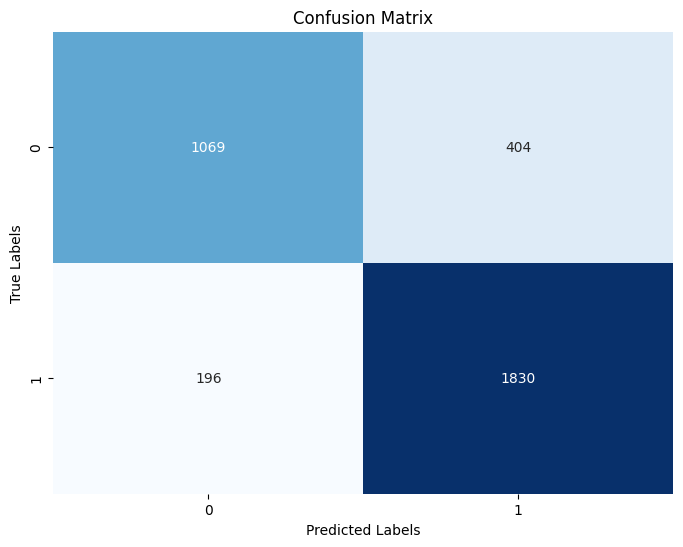

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### TF-IDF

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [ ]:
data = pd.read_csv("drive/MyDrive/train.csv")

In [ ]:
merged_df = pd.merge(data, game_overview, on='title', how='inner')
merged_df

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
...,...,...,...,...,...,...,...,...,...
17489,25535,EverQuest II,2012.0,Arguably the single greatest mmorp that exists...,1,Daybreak Game Company,Daybreak Game Company,"['Free to Play', 'Massively Multiplayer', 'RPG...",EverQuest® II is the epitome of massively mult...
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own cha...",1,Daybreak Game Company,Daybreak Game Company,"['Free to Play', 'Massively Multiplayer', 'RPG...",EverQuest® II is the epitome of massively mult...
17491,25537,EverQuest II,2011.0,When I frist started playing Everquest 2 it wa...,1,Daybreak Game Company,Daybreak Game Company,"['Free to Play', 'Massively Multiplayer', 'RPG...",EverQuest® II is the epitome of massively mult...
17492,25538,EverQuest II,NaN,cool game. THe only thing that REALLY PISSES M...,1,Daybreak Game Company,Daybreak Game Company,"['Free to Play', 'Massively Multiplayer', 'RPG...",EverQuest® II is the epitome of massively mult...


In [ ]:
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

merged_df['cleaned_text'] = merged_df['user_review'].apply(preprocess_text) + ' ' + merged_df['overview'].apply(preprocess_text)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.8)
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_df['cleaned_text'])

In [ ]:
num_clusters = 32
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=32, random_state=42)

In [ ]:
cluster_labels = kmeans.labels_

In [ ]:
game_related_words = {}

for i, row in merged_df.iterrows():
    game_id = row['title']
    game_related_words[game_id] = []
    game_cluster_label = cluster_labels[i]
    cluster_center = kmeans.cluster_centers_[game_cluster_label]
    top_word_indices = cluster_center.argsort()[-10:][::-1]
    top_words = [tfidf_vectorizer.get_feature_names_out()[index] for index in top_word_indices]
    game_related_words[game_id] = top_words

# Print the top words associated with each game
for game_id, words in game_related_words.items():
    print(f"Game ID: {game_id}")
    print("Top Words:", ", ".join(words))
    print()


Game ID: Spooky's Jump Scare Mansion
Top Words: wait, room, beat, 1000, terror, skin, running, insane, finally, youre

Game ID: Sakura Clicker
Top Words: hero, dota, there, defeat, ally, included, never, playing, play, item

Game ID: WARMODE
Top Words: squad, early, shooter, access, like, play, black, money, free, system

Game ID: Fractured Space
Top Words: episode, ship, team, space, capital, put, 5v5, keep, conquest, active

Game ID: Dota 2
Top Words: hero, dota, there, defeat, ally, included, never, playing, play, item

Game ID: Path of Exile
Top Words: exile, wraeclast, hideout, gem, forsaken, variation, path, dark, combination, mission

Game ID: War Thunder
Top Words: thunder, war, historical, vehicle, naval, linux, playstation, share, 1000, window

Game ID: Ring of Elysium
Top Words: squad, early, shooter, access, like, play, black, money, free, system

Game ID: Team Fortress 2
Top Words: hat, tf2, mode, class, free, style, character, one, co, trade

Game ID: Yu-Gi-Oh! Duel Links